# **NLP - Assignment 1 (Set 3 - News Headlines dataset for Sarcasm Detection)**

### **1. Import Libraries**

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
from sklearn.feature_extraction import text
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger') 
nltk.download('tagsets')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('treebank')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


True

### **2. Import Dataset**

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
%cd /content/drive/My Drive/Colab Notebooks/NLP/


/content/drive/My Drive/Colab Notebooks/NLP


In [4]:
sarcasm = pd.read_json('Sarcasm_Headlines_Dataset_v2.json', lines=True)

In [5]:
sarcasm.head(20)

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
5,0,my white inheritance,https://www.huffingtonpost.com/entry/my-white-...
6,0,5 ways to file your taxes with less stress,https://www.huffingtonpost.com/entry/5-ways-to...
7,1,richard branson's global-warming donation near...,https://www.theonion.com/richard-bransons-glob...
8,1,shadow government getting too large to meet in...,https://politics.theonion.com/shadow-governmen...
9,0,lots of parents know this scenario,https://www.huffingtonpost.comhttp://pubx.co/6...


In [6]:
sarcasm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


In [7]:
sarcasm.describe()

,is_sarcastic
count,28619.000000
mean,0.476397
std,0.499451
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


#### ***Removing punctuations from headline column***

In [8]:
# https://www.pythondaddy.com/python/how-to-remove-punctuation-from-a-dataframe-in-pandas-and-python/
sarcasm["headline"] = sarcasm['headline'].str.replace('[^\w\s]','')
sarcasm.head(20)

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep totally nails why congress is falling ...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word stream...,https://www.theonion.com/mother-comes-pretty-c...
5,0,my white inheritance,https://www.huffingtonpost.com/entry/my-white-...
6,0,5 ways to file your taxes with less stress,https://www.huffingtonpost.com/entry/5-ways-to...
7,1,richard bransons globalwarming donation nearly...,https://www.theonion.com/richard-bransons-glob...
8,1,shadow government getting too large to meet in...,https://politics.theonion.com/shadow-governmen...
9,0,lots of parents know this scenario,https://www.huffingtonpost.comhttp://pubx.co/6...


#### ***Removing stopwords from the text in 'headline' column***

In [9]:
# Import stopwords with scikit-learn
stop = text.ENGLISH_STOP_WORDS

In [10]:
# https://stackoverflow.com/questions/29523254/python-remove-stop-words-from-pandas-dataframe
# Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.
sarcasm['headline'] = sarcasm['headline'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
sarcasm.head(20)

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep totally nails congress falling short g...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat veggies 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar getting work,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close using word streaming...,https://www.theonion.com/mother-comes-pretty-c...
5,0,white inheritance,https://www.huffingtonpost.com/entry/my-white-...
6,0,5 ways file taxes stress,https://www.huffingtonpost.com/entry/5-ways-to...
7,1,richard bransons globalwarming donation nearly...,https://www.theonion.com/richard-bransons-glob...
8,1,shadow government getting large meet marriott ...,https://politics.theonion.com/shadow-governmen...
9,0,lots parents know scenario,https://www.huffingtonpost.comhttp://pubx.co/6...


### Create a CountVectorizer object and split the data into training and testing sets. 

**Tokenizing text -** \
Text preprocessing, tokenizing and filtering of stopwords are all included in CountVectorizer, which builds a dictionary of features and transforms documents to feature vectors.

**Create a Bag of Words -** \
Next we’ll create a Bag of Words. We simply instantiate CountVectorizer() and use fit_transform() on the `headline` column, and then use NumPy to convert the resulting Bag of Words (or BOW) to an array, so it can be used by the model.

In [11]:
# Extracting features from text or `headlines`
count_vec = CountVectorizer()
bagOfWords = count_vec.fit_transform(sarcasm['headline'])
array_bagOfWords = bagOfWords.toarray()

In [12]:
len(array_bagOfWords)

28619

In [13]:
bagOfWords.shape

(28619, 29324)

In [14]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(bagOfWords)
X_train_tfidf.shape

(28619, 29324)

**Split the data -** \
Next we’ll pass the bow Bag of Words to X to use as our features set, then define is_sarcastic as our target variable. We’ll use a stratified split to put equal proportions of the positive class in the training and test sets and will define the test size as 20% of the total data.

Create two objects X and y. X will be the 'headline' column of sarcasm dataframe and y will be the 'is_sarcastic' column. 

In [15]:
#Segregating Bag Of words obtained after CountVectorization of `headline` & `is_sarcastic` columns from the dataset
X = bagOfWords  #--> More accuracy as compared to tfidf
y = sarcasm['is_sarcastic']

Note:- **We have tested accuracy of the model by using TF-IDF Transformer after CountVectorizer (with TFIDF Transformer approx - 78.5%), but it was decreasing the accuracy score (since without Tf-IDF it is approx 80%), thereby we are proceeding only with `CountVectorizer`**

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    stratify=y)

In [17]:
print("Training data size - ", X_train.shape)

print("Test data size - ", X_test.shape)

Training data size -  (22895, 29324)
Test data size -  (5724, 29324)


**Fit the model** \
There are various models we can use for this, but Multinomial Naive Bayes is typically one of the best on data of this type. We’ll fit the MultinomialNB() model to the training data and then generate some predictions on the unseen test data.

In [18]:
model = MultinomialNB().fit(X_train, y_train)
y_pred = model.predict(X_test)

**Evaluate model performance -** \
We can assess the performance of the model by examining how well it did on the test data. For this we can use accuracy score, F1 score, and the ROC/AUC score.\
Results are pretty good for a simple model. Turns out we can detect sarcasm (or satire), despite no previous context.

In [19]:
print('Accuracy:', accuracy_score(y_test, y_pred))
print('F1 score:', f1_score(y_test, y_pred, average="macro"))
print('ROC AUC:', roc_auc_score(y_test, y_pred))

Accuracy: 0.810796645702306
F1 score: 0.8100577916406875
ROC AUC: 0.8096561908443096


In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      2997
           1       0.81      0.79      0.80      2727

    accuracy                           0.81      5724
   macro avg       0.81      0.81      0.81      5724
weighted avg       0.81      0.81      0.81      5724



### Display the confusion Matrix.

In [21]:
confusion_matrix(y_test, y_pred)

array([[2499,  498],
       [ 585, 2142]])

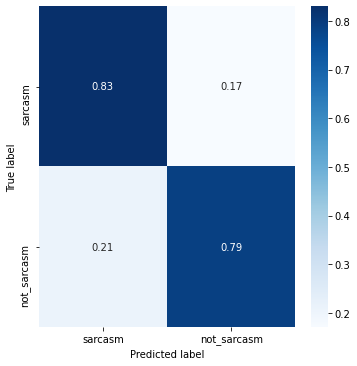

In [22]:
classes=["sarcasm","not_sarcasm"]
con_mat = tf.math.confusion_matrix(labels= y_test, predictions=y_pred).numpy()

con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                     index = classes, 
                     columns = classes)

figure = plt.figure(figsize=(5, 5))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## Display the HMM POS tagging on the first 4 rows of ‘headline’

In [23]:
array_headlines = sarcasm['headline']

In [24]:
# Pick first 4 sentences from the corpus
start_sentences = array_headlines[:4]

 **Tokenize by sentence, then by lowercase word**

In [25]:
#Capturing special characters to print the output in bold 
start = "\033[1m"
end = "\033[0;0m"

In [26]:
for i,text in enumerate(start_sentences):
    # Tokenize by sentence, then by lowercase word
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    print(start + "Tokens of sentence ", i+1, end)
    print(tokens)
    # print("\n")
    tagged = nltk.pos_tag(tokens)
    print(start + "Tagging of sentence ", i+1, " is -", end)
    print(tagged)
    entities = nltk.chunk.ne_chunk(tagged)
    print(start + "Identifying named entities of sentence ", i+1, "-", end)
    print(entities)
    print("\n\n")

Tokens of sentence  1 
['thirtysomething', 'scientists', 'unveil', 'doomsday', 'clock', 'hair', 'loss']
Tagging of sentence  1  is - 
[('thirtysomething', 'VBG'), ('scientists', 'NNS'), ('unveil', 'JJ'), ('doomsday', 'JJ'), ('clock', 'NN'), ('hair', 'NN'), ('loss', 'NN')]
Identifying named entities of sentence  1 - 
(S
  thirtysomething/VBG
  scientists/NNS
  unveil/JJ
  doomsday/JJ
  clock/NN
  hair/NN
  loss/NN)



Tokens of sentence  2 
['dem', 'rep', 'totally', 'nails', 'congress', 'falling', 'short', 'gender', 'racial', 'equality']
Tagging of sentence  2  is - 
[('dem', 'NN'), ('rep', 'NN'), ('totally', 'RB'), ('nails', 'JJ'), ('congress', 'NN'), ('falling', 'VBG'), ('short', 'JJ'), ('gender', 'NN'), ('racial', 'JJ'), ('equality', 'NN')]
Identifying named entities of sentence  2 - 
(S
  dem/NN
  rep/NN
  totally/RB
  nails/JJ
  congress/NN
  falling/VBG
  short/JJ
  gender/NN
  racial/JJ
  equality/NN)



Tokens of sentence  3 
['eat', 'veggies', '9', 'deliciously', 'different', '

**Note:- To refer any tag in the above classified words please refer to below help tagset info from `nltk`**

In [27]:
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or